In [18]:
from keras.datasets import cifar10
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils

In [19]:
nb_epoch = 100
batch_size = 128
nb_classes = 10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.reshape(50000, 32 * 32 * 3)
X_test = X_test.reshape(10000, 32 * 32 * 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# MLP
model = Sequential()
model.add(Dense(1024, input_shape=(3072, )))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])
model.summary()

# training
history = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=1,
                    validation_data=(X_test, Y_test))


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1024)              3146752   
                                                                 
 activation_24 (Activation)  (None, 1024)              0         
                                                                 
 dropout_18 (Dropout)        (None, 1024)              0         
                                                                 
 dense_25 (Dense)            (None, 512)               524800    
                                                                 
 activation_25 (Activation)  (None, 512)               0         
                                                                 
 dropout_19 (Dropout)        (None, 512)               0         
                                                                 
 dense_26 (Dense)            (None, 512)              

In [20]:
import matplotlib.pyplot as plt

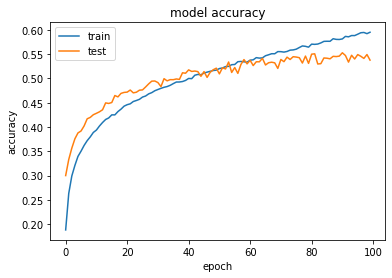

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

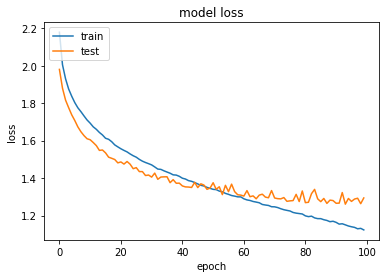

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
# loss, acc = model.evaluate(X_test, Y_test, verbose=0)
# print('Test loss:', loss)
# print('Test acc:', acc)

In [24]:
from sklearn import metrics
from sklearn.metrics import classification_report
y_pred=model.predict(X_test)
y_label=np.argmax(y_pred , axis=1)
print('accuracy: ',metrics.accuracy_score(y_test, y_label))
print('CL Report: \n',metrics.classification_report(y_test, y_label, zero_division=1))

313/313 [==============================] - 1s 2ms/step
accuracy:  0.5378
CL Report: 
               precision    recall  f1-score   support

           0       0.55      0.66      0.60      1000
           1       0.61      0.72      0.66      1000
           2       0.39      0.47      0.43      1000
           3       0.46      0.26      0.33      1000
           4       0.43      0.56      0.48      1000
           5       0.51      0.39      0.44      1000
           6       0.63      0.51      0.57      1000
           7       0.59      0.64      0.62      1000
           8       0.59      0.74      0.65      1000
           9       0.69      0.43      0.53      1000

    accuracy                           0.54     10000
   macro avg       0.54      0.54      0.53     10000
weighted avg       0.54      0.54      0.53     10000



313/313 [==============================] - 1s 2ms/step


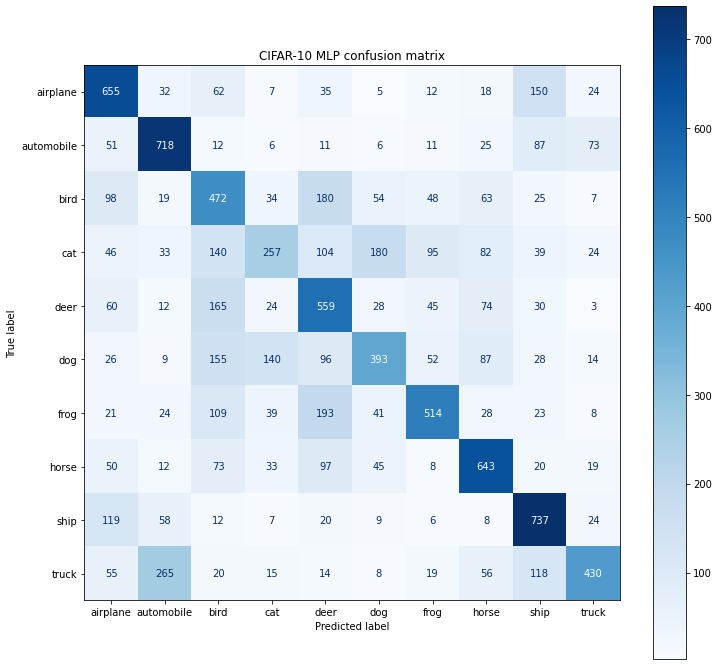

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix


y_pred=model.predict(X_test)
y_label=np.argmax(y_pred , axis=1)

labels = ["airplane", "automobile", "bird","cat","deer","dog","frog","horse","ship","truck"]

cm = confusion_matrix(list(y_test), list(y_label))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(12,12))
ax.set_title('CIFAR-10 MLP confusion matrix')
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.show()